In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install  streamlit==1.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 108.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.4 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=b1e0fa9a30a7f640daeba583056578f19be6d6043fd

In [3]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=1904613c092cee4615b0e7009d40b783a99278e0d6d7c6ed316012874719702e
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [4]:
!ngrok authtoken xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [5]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 361.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.9 MB/s eta 0:00:00


In [20]:
%%writefile streamlit_SLBBox_App.py 
import cv2
import numpy as np
import pandas 
import torch
import math
from PIL import Image, ImageDraw
#import streamlit as st
from IPython.display import Image, display
import matplotlib.pyplot as plt

import streamlit as st 
#st.markdown(""" **Sign Language Detection** """)

#File upload widget
uploaded_file = st.file_uploader("Choose a file")
if uploaded_file is not None:
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    opencv_image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    st.markdown(""" **Abilities Infinite** """)

    
    
    from roboflow import Roboflow
    rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")
    rf = Roboflow(api_key="X9dGHYzCX3ODnOoJl0Cn")
    project = rf.workspace("tejashri-dendi-wubeu").project("american-sign-language-letters-mjfzz")
    
    model = project.version(2).model
    #model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
    # Predictions of model:[(x,y),w,h, class , confidence] 
    predictionX = model.predict(opencv_image).json()['predictions'][0]['x']
    predictionY = model.predict(opencv_image).json()['predictions'][0]['y']
    predictionWidth = model.predict(opencv_image).json()['predictions'][0]['width']
    predictionHeight = model.predict(opencv_image).json()['predictions'][0]['height']
    predictionclass = model.predict(opencv_image).json()['predictions'][0]['class']
    predictionConfidence = model.predict(opencv_image).json()['predictions'][0]['confidence']
    
    predictionConfidence=round(predictionConfidence, 2)
    predictionConfidence=predictionConfidence*100
    
    #Draw Bounding Box
    x0 = int(predictionX - predictionWidth / 2)
    x1 = int(predictionX + predictionWidth / 2)
    y0 = int(predictionY - predictionHeight / 2)
    y1 = int(predictionY + predictionHeight / 2)
    Outputmg=cv2.rectangle(opencv_image, (x0, y0), (x1, y1),(0, 255, 0), 2)
    print(model.predict(opencv_image).json())
    Outputmg=cv2.putText(opencv_image,str(predictionclass),(x0, y0-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (240, 0, 240), 2)
    
    Outputmg=cv2.putText(opencv_image,str(predictionConfidence),(x0+30, y0-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (240, 0, 240), 2)
    #display(Image(Outputmg))
    
    #i3 = prediction[0, :, :, 0] # Shape is (224, 224) here
    #i3 = (i3*255).astype(np.uint8) # scale to 0-255  range and convert to int
    #cv2.imwrite('my.png', i3) # better use png
    #plt.imshow(Outputmg)
    #plt.savefig(Outputmg, str(uuid.uuid4()) + '_img.png')
    #Outputmg.convert(mode='RGB')
    #Outputmg.save('my.jpg')
    #display(Image(filename='my.jpg'))
    #plt.imshow(Outputmg)
    # Filename
    filename = 'savedImage.jpg'
  
    # Using cv2.imwrite() method
    # Saving the image
    cv2.imwrite(filename, Outputmg)
    display(Image(filename='savedImage.jpg'))
    # show the output image
    st.image(Outputmg, channels="BGR")


Overwriting streamlit_SLBBox_App.py


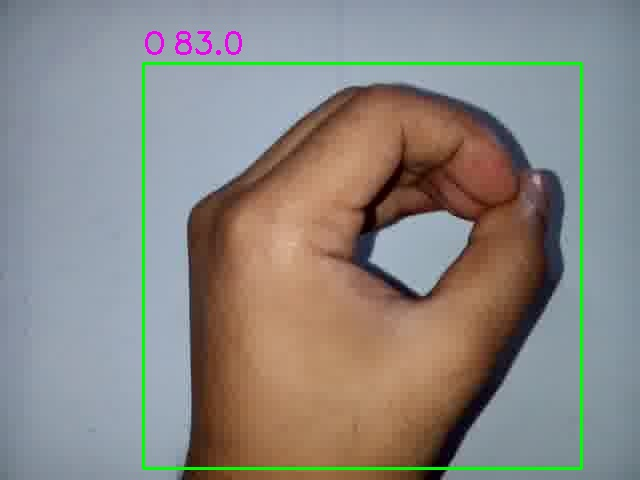

In [25]:
from PIL import Image, ImageDraw
#import streamlit as st
from IPython.display import Image, display
display(Image(filename='savedImage.jpg'))

In [24]:
!streamlit run /content/streamlit_SLBBox_App.py & npx localtunnel --port 8501

2023-01-31 10:16:45.691 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[###########.......] / extract:yargs-parser: sill extract yargs-parser@^20.2.2

npx: installed 22 in 2.474s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.204.34.162:8501


  A new version of Streamlit is available.

  See what's new at https://discuss.streamlit.io/c/announcements

  Enter the following command to upgrade:
  $ pip install streamlit --upgrade

your url is: https://strong-ends-fail-35-204-34-162.loca.lt
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5
loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 369.5, 'y': 252.5, 'width': 403.0, 'height': 371.0, 'confidence': 0.875943660736084, 'class': 'O', 'image_path': array([[[119, 107,  97],
        [119, 107,  97],
        [119, 107,  97],
        ...,
        [129, 118, 104],
 